In [1]:
%cd ..

/home/anatoly/Private/GitHub/renokan/study_ds/WeatherAUS-5


## Feature engineering

In [2]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
%lf data/

-rw-rw-r-- 1 anatoly 12807959 июл 27 23:56 actual_data.csv
-rw-rw-r-- 1 anatoly  2793277 июл 27 23:56 future_data.csv
-rw-rw-r-- 1 anatoly    35935 авг  1 01:50 split_dataset.ipynb
-rw-rw-r-- 1 anatoly 14094055 дек 11  2020 weatherAUS.csv


In [4]:
df = pd.read_csv("data/actual_data.csv")

In [5]:
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118898,2015-12-27,Uluru,20.5,34.7,0.0,NaN,NaN,E,52.0,ESE,...,23.0,12.0,1013.2,1010.1,NaN,NaN,24.3,33.0,No,No
118899,2015-12-28,Uluru,18.0,36.4,0.0,NaN,NaN,ESE,54.0,E,...,17.0,7.0,1014.7,1010.9,NaN,NaN,26.7,35.0,No,No
118900,2015-12-29,Uluru,17.5,37.1,0.0,NaN,NaN,E,56.0,E,...,12.0,7.0,1012.6,1007.5,NaN,NaN,28.1,34.7,No,No
118901,2015-12-30,Uluru,20.0,38.9,0.0,NaN,NaN,E,59.0,E,...,12.0,12.0,1007.2,1002.6,NaN,1.0,31.3,38.4,No,No


### 1. Create regions

In [6]:
location_stats = pd.crosstab(df['Location'],
                             df['RainTomorrow'],
                                 normalize='index')

location_stats.sort_values(by='Yes')[::3]

RainTomorrow,No,Yes
Location,,
Uluru,0.939271,0.060729
Mildura,0.890467,0.109533
Nhil,0.856031,0.143969
Townsville,0.830196,0.169804
PearceRAAF,0.819650,0.180350
PerthAirport,0.811917,0.188083
Perth,0.800830,0.199170
Penrith,0.793514,0.206486
Adelaide,0.776166,0.223834


In [7]:
def create_regions(location_stats):
    regions = location_stats.copy()
    labels = ["1", "2", "3", "4", "5", "6", "7"]
    
    for _ in range(5):
        x_regions = labels[-1]
        name_column = x_regions + '_Region'
        
        regions[name_column] = pd.cut(location_stats.loc[:, 'Yes'].values,
                                      bins=len(labels), labels=labels)
        labels.pop()

    return regions

In [8]:
regions = create_regions(location_stats)
regions.sort_values(by='Yes')

RainTomorrow,No,Yes,7_Region,6_Region,5_Region,4_Region,3_Region
Location,,,,,,,
Uluru,0.939271,0.060729,1,1,1,1,1
Woomera,0.934500,0.065500,1,1,1,1,1
AliceSprings,0.921137,0.078863,1,1,1,1,1
Mildura,0.890467,0.109533,2,1,1,1,1
Cobar,0.876067,0.123933,2,2,2,1,1
Moree,0.863402,0.136598,2,2,2,1,1
Nhil,0.856031,0.143969,2,2,2,2,1
Katherine,0.849222,0.150778,3,2,2,2,1
SalmonGums,0.843194,0.156806,3,2,2,2,1


In [9]:
select_region = '7_Region'

for region in sorted(regions[select_region].unique()):
    check_region = regions[regions[select_region] == region].index
    
    rains_region = df.loc[df['Location'].isin(check_region),
                          'RainTomorrow']

    print()
    print("RainTomorrow:", rains_region.count())

    rains_region = rains_region.value_counts(normalize=True)
    rains_region.name = region + '_region'
    
    print(rains_region)


RainTomorrow: 5944
No     0.929677
Yes    0.070323
Name: 1_region, dtype: float64

RainTomorrow: 8282
No     0.874306
Yes    0.125694
Name: 2_region, dtype: float64

RainTomorrow: 23356
No     0.823086
Yes    0.176914
Name: 3_region, dtype: float64

RainTomorrow: 25026
No     0.787981
Yes    0.212019
Name: 4_region, dtype: float64

RainTomorrow: 29311
No     0.743509
Yes    0.256491
Name: 5_region, dtype: float64

RainTomorrow: 19547
No     0.700056
Yes    0.299944
Name: 6_region, dtype: float64

RainTomorrow: 4753
No     0.65222
Yes    0.34778
Name: 7_region, dtype: float64


### 2. Create features

In [10]:
trash = ['Evaporation', 'Sunshine', 'Cloud9am', 'Cloud3pm', 'Rainfall']
df = df.drop(columns=trash)
df.shape

(118903, 18)

In [11]:
num_features = df.select_dtypes(include='number').columns.to_list()

In [12]:
corr_matrix = df[num_features].corr()

In [13]:
corr_matrix = corr_matrix.mask(corr_matrix < 0.5, 0)

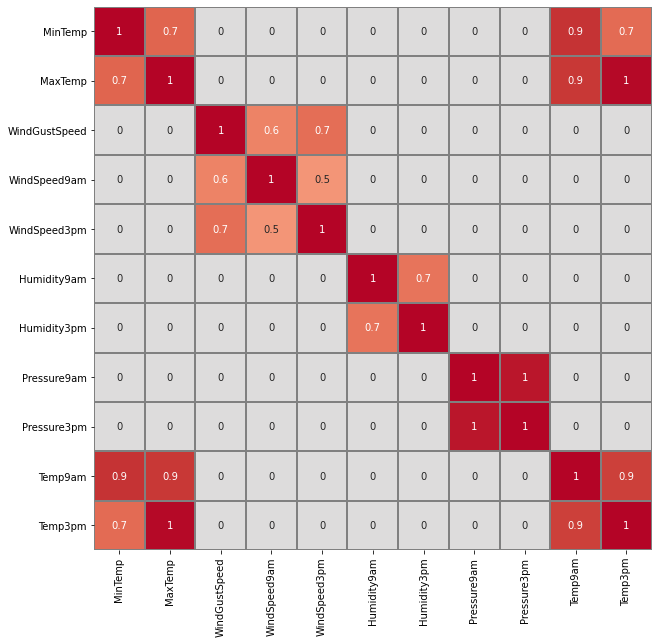

In [45]:
plt.figure(figsize=(10, 10))
sns.heatmap(corr_matrix, annot=True,
                vmin=-1, vmax=1, center=0, linewidths=1,
                cmap="coolwarm", fmt='.1g',
                linecolor='gray', cbar=False
           );

## WindSpeed features

In [15]:
wind_speed = df.filter(like="Speed").copy()
wind_speed.head()

,WindGustSpeed,WindSpeed9am,WindSpeed3pm
0,44.0,20.0,24.0
1,44.0,4.0,22.0
2,46.0,19.0,26.0
3,24.0,11.0,9.0
4,41.0,7.0,20.0


In [16]:
wind_speed_diff = (df['WindGustSpeed'] - df['WindSpeed3pm']).abs()

In [17]:
wind_speed.corrwith(wind_speed_diff)

WindGustSpeed    0.769766
WindSpeed9am     0.377857
WindSpeed3pm     0.066072
dtype: float64

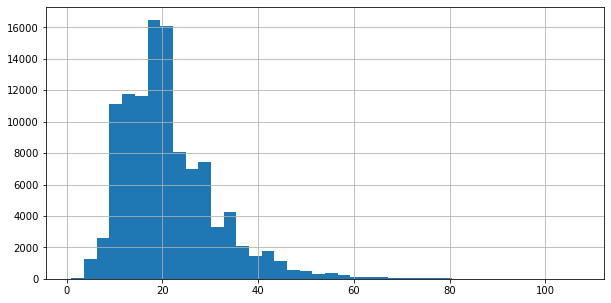

In [18]:
wind_speed_diff.hist(bins=40, figsize=(10, 5))
plt.show()

## Humidity features

In [19]:
humidity = df.filter(like="Humidity").copy()
humidity.head()

,Humidity9am,Humidity3pm
0,71.0,22.0
1,44.0,25.0
2,38.0,30.0
3,45.0,16.0
4,82.0,33.0


In [20]:
humidity_diff = (df['Humidity3pm'] - df['Humidity9am']).abs()

In [21]:
humidity.corrwith(humidity_diff)

Humidity9am    0.284503
Humidity3pm   -0.397433
dtype: float64

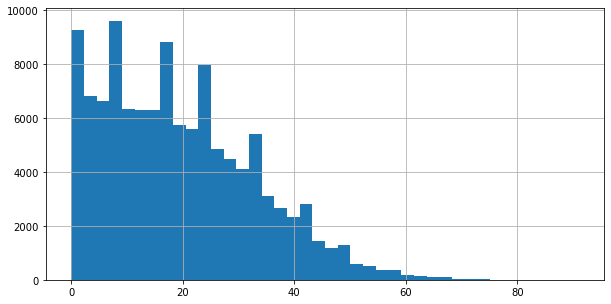

In [22]:
humidity_diff.hist(bins=40, figsize=(10, 5))
plt.show()

## Pressure features

In [23]:
pressure = df.filter(like="Pressure").copy()
pressure.head()

,Pressure9am,Pressure3pm
0,1007.7,1007.1
1,1010.6,1007.8
2,1007.6,1008.7
3,1017.6,1012.8
4,1010.8,1006.0


In [24]:
pressure_diff = (df['Pressure3pm'] - df['Pressure9am']).abs()

In [25]:
pressure.corrwith(pressure_diff)

Pressure9am    0.029546
Pressure3pm   -0.187098
dtype: float64

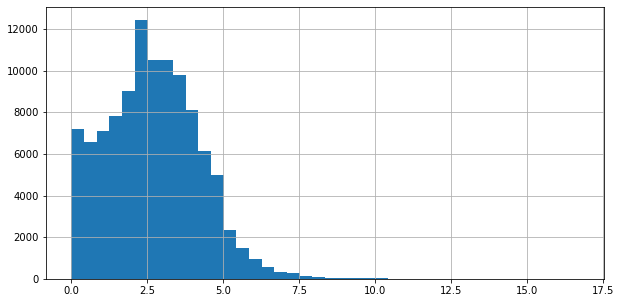

In [26]:
pressure_diff.hist(bins=40, figsize=(10, 5))
plt.show()

## Temp features

In [27]:
temperature = df.filter(like="Temp").copy()
temperature.head()

,MinTemp,MaxTemp,Temp9am,Temp3pm
0,13.4,22.9,16.9,21.8
1,7.4,25.1,17.2,24.3
2,12.9,25.7,21.0,23.2
3,9.2,28.0,18.1,26.5
4,17.5,32.3,17.8,29.7


In [28]:
temperature_diff = (df['MaxTemp'] - df['MinTemp']).abs()

In [29]:
temperature.corrwith(temperature_diff)

MinTemp   -0.240735
MaxTemp    0.483838
Temp9am    0.104285
Temp3pm    0.491820
dtype: float64

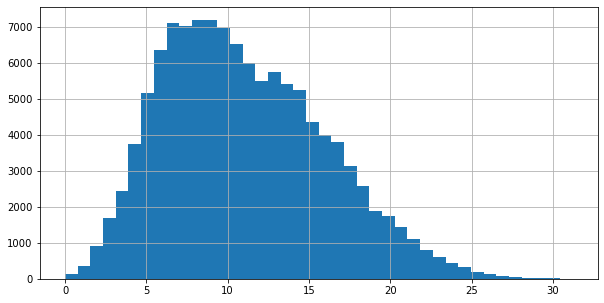

In [30]:
temperature_diff.hist(bins=40, figsize=(10, 5))
plt.show()

## WindDir features

In [31]:
wind_dir = df.filter(like="Dir").copy()
wind_dir.head()

,WindGustDir,WindDir9am,WindDir3pm
0,W,W,WNW
1,WNW,NNW,WSW
2,WSW,W,WSW
3,NE,SE,E
4,W,ENE,NW


In [32]:
wind_dir_change = (df['WindGustDir'] == df['WindDir3pm']).map({True: 1, False: 0})

In [33]:
wind_dir_change.value_counts()

0    84416
1    34487
dtype: int64

In [34]:
pd.crosstab(wind_dir_change, df['RainTomorrow'],
            normalize='index', rownames=['Change'])

RainTomorrow,No,Yes
Change,,
0,0.774478,0.225522
1,0.782700,0.217300


In [35]:
pd.crosstab(df['WindDir3pm'], df['RainTomorrow'],
            normalize='index', rownames=['WindDir3pm'])

RainTomorrow,No,Yes
WindDir3pm,,
E,0.830756,0.169244
ENE,0.821440,0.178560
ESE,0.829186,0.170814
N,0.728931,0.271069
NE,0.811279,0.188721
NNE,0.759398,0.240602
NNW,0.716229,0.283771
NW,0.715685,0.284315
S,0.783886,0.216114


In [36]:
pd.crosstab(df['WindDir9am'], df['RainTomorrow'],
            normalize='index', rownames=['WindDir9am'])

RainTomorrow,No,Yes
WindDir9am,,
E,0.858642,0.141358
ENE,0.827247,0.172753
ESE,0.851274,0.148726
N,0.695905,0.304095
NE,0.797094,0.202906
NNE,0.736883,0.263117
NNW,0.691389,0.308611
NW,0.719138,0.280862
S,0.802737,0.197263


In [37]:
df['WindDir9am'].str.slice(stop=1).value_counts()

N    36055
S    35106
E    20058
W    18757
Name: WindDir9am, dtype: int64

In [38]:
wind_dir_change2 = (df['WindGustDir'].str.slice(stop=1) == \
                    df['WindDir3pm'].str.slice(stop=1)
                    ).map({True: 1, False: 0})

In [39]:
wind_dir_change2.value_counts()

1    72914
0    45989
dtype: int64

In [40]:
pd.crosstab(wind_dir_change2, df['RainTomorrow'],
            normalize='index', rownames=['Change'])

RainTomorrow,No,Yes
Change,,
0,0.768718,0.231282
1,0.781952,0.218048


## Date feature

In [41]:
date_month = pd.to_datetime(df['Date']).dt.month_name()
date_month.value_counts()

August       10509
October      10509
July         10506
March        10323
May          10315
November     10199
January      10198
September    10170
June          9990
December      9574
April         8610
February      8000
Name: Date, dtype: int64

In [42]:
pd.crosstab(date_month, df['RainTomorrow'],
                normalize='index', rownames=['Month']
            ).sort_values(by='Yes', ascending=False)

RainTomorrow,No,Yes
Month,,
June,0.735019,0.264981
July,0.737047,0.262953
August,0.751244,0.248756
May,0.770900,0.229100
April,0.774492,0.225508
February,0.775701,0.224299
November,0.777202,0.222798
September,0.786486,0.213514
December,0.791547,0.208453


In [43]:
date_week = pd.to_datetime(df['Date']).dt.isocalendar().week
date_week.value_counts()

45    2380
46    2380
47    2380
44    2377
38    2373
37    2373
36    2373
35    2373
34    2373
33    2373
32    2373
31    2373
29    2373
28    2373
43    2373
42    2373
41    2373
40    2373
39    2373
30    2370
27    2367
20    2331
18    2331
12    2331
11    2331
19    2331
10    2331
23    2331
25    2331
26    2331
24    2331
22    2330
21    2324
4     2303
3     2303
2     2303
48    2288
13    2193
1     2186
5     2167
50    2163
51    2163
49    2162
52    2160
9     2135
17    2055
16    2009
15    2009
14    2009
8     1988
7     1988
6     1988
53     518
Name: week, dtype: Int64

In [44]:
pd.crosstab(date_week, df['RainTomorrow'],
                normalize='index', rownames=['Week']
            ).sort_values(by='Yes', ascending=False)

RainTomorrow,No,Yes
Week,,
28,0.689043,0.310957
21,0.702715,0.297285
22,0.713222,0.286778
30,0.720104,0.279896
25,0.721022,0.278978
33,0.727821,0.272179
29,0.730125,0.269875
24,0.732182,0.267818
48,0.737799,0.262201
